In [1]:
import torch

import torch.nn as nn

#from nvae.utils import add_sn
#from nvae.vae_celeba import NVAE
import numpy as np
import matplotlib.pyplot as plt
#from nvae.utils import reparameterize
from torchvision import datasets, transforms


import os


In [2]:
device = ("cuda:0" if torch.cuda.is_available() else "cpu") # Use GPU or CPU for training

from vae import VAE_big

model = VAE_big(device, image_channels=3).to(device)

train_data_size = 162079
epochs = 199

beta_value = 5.0


model.load_state_dict(torch.load('/home/luser/autoencoder_attacks/saved_celebA/checkpoints/celebA_CNN_VAE_big_trainSize'+str(train_data_size)+'_epochs'+str(epochs)+'.torch'))


#model.load_state_dict(torch.load('/home/luser/autoencoder_attacks/saved_celebA/checkpoints/celebA_CNN_VAE'+str(beta_value)+'_big_trainSize'+str(train_data_size)+'_epochs'+str(epochs)+'.torch'))


model.eval()

VAE_big(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2))
    (9): ReLU()
    (10): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(4, 4), stride=(2, 2))
    (13): ReLU()
    (14): Flatten()
  )
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=1024, bias=True)
  (decoder): Sequential(
    (0): UnFlatten()
    (1): ConvTranspose2d(1024, 256, kernel_size=(5, 5), stride=(2, 2))
    (2): ReLU()
    (3): ConvTranspose2d(256, 128, kern

In [3]:
desired_norm_l2 = 6.666609  # Change this to your desired constant value
desired_norm_l_inf = 0.9  # Change this to your desired constant value


noise_addition = (2.0 * torch.rand(1, 3, 64, 64).to(device) - 1.0) 

current_L_2_norm = torch.norm(noise_addition, 2)
current_L_inf_norm = torch.norm(noise_addition, p=float('inf'))

print("current_L_2_norm", current_L_2_norm)
print("current_L_inf_norm", current_L_inf_norm)


scaled_noise = noise_addition * (desired_norm_l2 / current_L_2_norm) *  (desired_norm_l_inf / current_L_inf_norm)


final_l2_norm = torch.norm(scaled_noise, 2)

print("final_l2_norm", final_l2_norm)

l_inf_norm_after_scaling = torch.norm(scaled_noise, p=float('inf'))

print("l_inf_norm_after_scaling", l_inf_norm_after_scaling)


# target l2 - 6.0, target l_inf - 0.094


current_L_2_norm tensor(63.3547, device='cuda:0')
current_L_inf_norm tensor(1.0000, device='cuda:0')
final_l2_norm tensor(6.0001, device='cuda:0')
l_inf_norm_after_scaling tensor(0.0947, device='cuda:0')


In [4]:
noise_addition.max(), noise_addition.min()

(tensor(1.0000, device='cuda:0'), tensor(-0.9996, device='cuda:0'))

In [5]:
scaled_noise.max(), scaled_noise.min()

(tensor(0.0947, device='cuda:0'), tensor(-0.0947, device='cuda:0'))

# For Beta VAE with Beta  = 5.0 min and maximum damaged images

## Your VAE specific min and max segments

In [6]:
all_features = ["youngmen", "oldmen", "youngwomen", "oldwomen"]

feature = all_features[0]


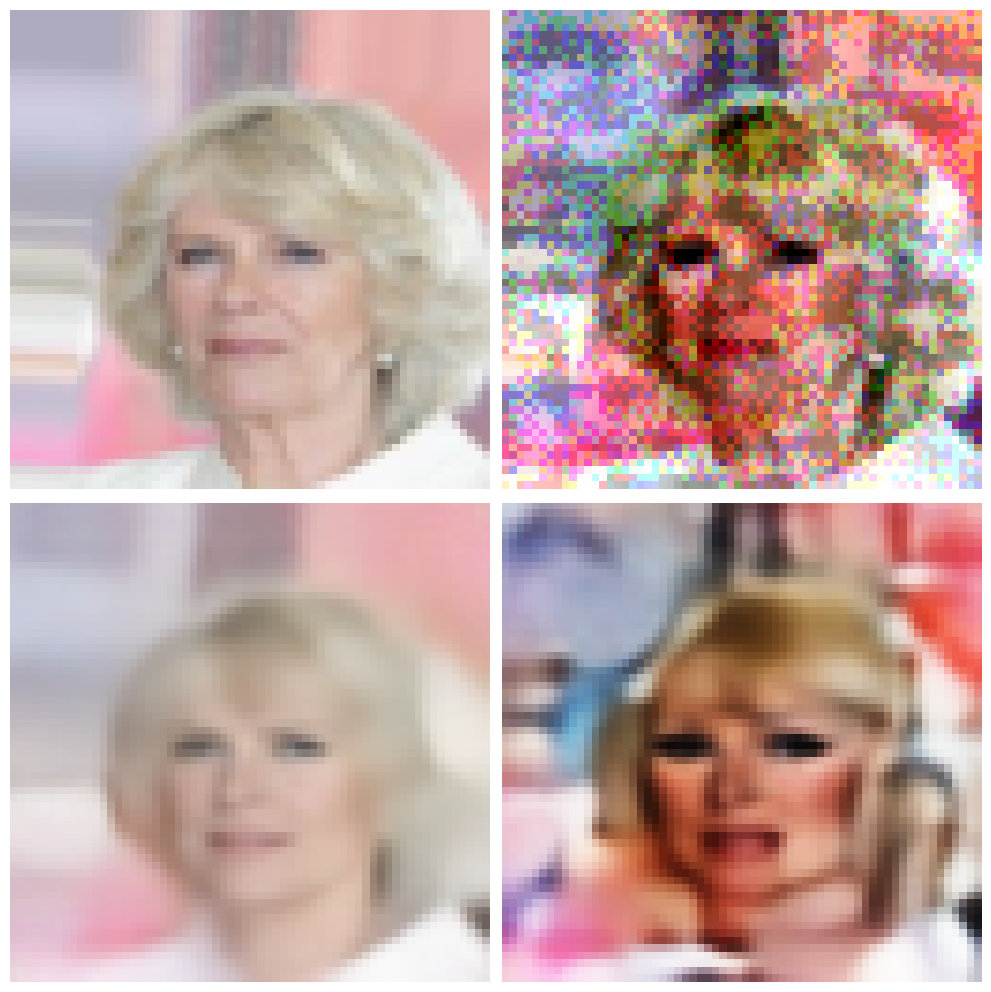

In [7]:
segment = 29

beta_value = 5.0
#model.load_state_dict(torch.load('/home/luser/autoencoder_attacks/saved_celebA/checkpoints/celebA_CNN_VAE'+str(beta_value)+'_big_trainSize'+str(train_data_size)+'_epochs'+str(epochs)+'.torch'))

#model.eval()



desired_norm_l_inf = 0.094

#all_features = ["bald", "beard", "oldfemaleGlass", "hat"]#, "generalWhiteWomen", "blackWomen"]

universal_features_list = ["bald", "beard", "oldfemaleGlass", "hat", "blackWomen", "generalWhiteWomen", "blackMen", "generalWhiteMen", "men", "women", "young", "old", "youngmen", "oldmen", "youngwomen", "oldwomen" ]

all_features = ["youngmen", "oldmen", "youngwomen", "oldwomen"]
feature = all_features[3]

source_im = torch.load("/home/luser/autoencoder_attacks/train_aautoencoders/fairness_trials/attack_saves/"+str(feature)+"_d/images.pt")[segment].unsqueeze(0).to(device) 
if(beta_value == 5.0 or beta_value == 10.0): 
    model.load_state_dict(torch.load('/home/luser/autoencoder_attacks/saved_celebA/checkpoints/celebA_CNN_VAE'+str(beta_value)+'_big_trainSize'+str(train_data_size)+'_epochs'+str(epochs)+'.torch'))
    optimized_noise = torch.load("/home/luser/autoencoder_attacks/train_aautoencoders/fairness_trials/attack_saves/"+str(feature)+"_d/"+str(feature)+"beta"+str(beta_value)+"_scaled_noise_"+str(desired_norm_l_inf)+"segment"+str(segment)+".pt", map_location=device).to(device) 
else:
    model.load_state_dict(torch.load('/home/luser/autoencoder_attacks/saved_celebA/checkpoints/celebA_CNN_VAE_big_trainSize'+str(train_data_size)+'_epochs'+str(epochs)+'.torch'))
    optimized_noise = torch.load("/home/luser/autoencoder_attacks/train_aautoencoders/fairness_trials/attack_saves/"+str(feature)+"_d/"+str(feature)+"_scaled_noise_"+str(desired_norm_l_inf)+"segment"+str(segment)+".pt", map_location=device).to(device) 
model.eval()


image_height, image_width, _ = source_im[0].cpu().detach().permute(1, 2, 0).cpu().numpy().shape
aspect_ratio = image_width / image_height

corresponding_class_polulations = [1819, 24707, 145, 2827]
#inside_feature_name = inside_feature_names[3]



actualOutput, _, _ = model(source_im)
ActualReconLoss = torch.sqrt((actualOutput - source_im)**2).mean(dim=(1, 2, 3), keepdim=True).squeeze()


DivAttackeImage = source_im + optimized_noise
NormalDivAttackeImage = (DivAttackeImage - DivAttackeImage.min())/(DivAttackeImage.max() - DivAttackeImage.min())
DivOutput,_,_ = model(NormalDivAttackeImage)
DivOutputL2ActualOutput = torch.sqrt((DivOutput - actualOutput)**2).mean(dim=(1, 2, 3), keepdim=True).squeeze()


all_source_images = torch.cat([source_im, NormalDivAttackeImage])
model.eval()
with torch.no_grad():
    image_recon, recon_loss, kl_losses = model(source_im)

    fig, ax = plt.subplots(2, 2, figsize=(10, 10/ aspect_ratio))
    ax[0][0].imshow(source_im[0].permute(1, 2, 0).cpu().numpy())
    #ax[0].set_title('Original Image')
    ax[0][0].axis('off')

    ax[1][0].imshow(actualOutput[0].cpu().detach().permute(1, 2, 0).cpu().numpy())
    #ax[1].set_title('Actual Reconstructed Image')
    ax[1][0].axis('off')

    ax[0][1].imshow(NormalDivAttackeImage[0].cpu().detach().permute(1, 2, 0).cpu().numpy())
    #ax[2].set_title('Adversarial Image')
    ax[0][1].axis('off')

    ax[1][1].imshow(DivOutput[0].cpu().detach().permute(1, 2, 0).cpu().numpy())
    #ax[3].set_title('Adversarial Reconstructed Image')
    ax[1][1].axis('off')
plt.tight_layout(pad=1)
#plt.savefig("/home/luser/autoencoder_attacks/a_fairness_results/qualitative_comparision/BetaVAE_qualitative_"+str(feature)+"im_no_"+str(segment)+".png")
plt.show()





In [8]:
all_source_images.shape

torch.Size([2, 3, 64, 64])

In [9]:
#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
all_men_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_men_d/men_disjoined'
all_men_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_men_d'
all_men_list = os.listdir(all_men_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("all men List: ", len(all_men_list))



#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
all_women_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_women_d/women_disjoined'
all_women_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_women_d'
all_women_list = os.listdir(all_women_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("all women List: ", len(all_women_list))


#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
all_young_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_young_d/young_disjoined'
all_young_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_young_d'
all_young_list = os.listdir(all_young_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("all young List: ", len(all_young_list))


#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
all_old_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_old_d/old_disjoined'
all_old_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_old_d'
all_old_list = os.listdir(all_old_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("all old List: ", len(all_old_list))


#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
young_men_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngMen_d/youngMen_disjoined'
young_men_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngMen_d'
young_men_list = os.listdir(young_men_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("young men List: ", len(young_men_list))


#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
old_men_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldMen_d/oldMen_disjoined'
old_men_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldMen_d'
old_men_list = os.listdir(old_men_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("old men List: ", len(old_men_list))


#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
old_women_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldWomen_d/oldWomen_disjoined'
old_women_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldWomen_d'
old_women_list = os.listdir(old_women_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("old women List: ", len(old_women_list))



#femaleGlass_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebAWomenGlasses/women_eyeglass'
young_women_address = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngWomen_d/youngWomen_disjoined'
young_women_parent = '/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngWomen_d'
young_women_list = os.listdir(young_women_address)
#femaleGlass_list.extend(os.listdir('/home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/women_eyeglass/'))
print("young women List: ", len(young_women_list))


all men List:  84434
all women List:  118165
all young List:  156734
all old List:  45865
young men List:  53447
old men List:  7003
old women List:  1116
young women List:  103287


# Autoencode and TSNE  to get them uin 2d

In [10]:
model.eval()
with torch.no_grad():
    ae_perturbed_embeds = model.encoder(all_source_images) # some confusion here. Why are you doin whatever you doing . Should not the input be  data + noise_outputs ?
    mu1, logvar1 = model.fc1(ae_perturbed_embeds), model.fc2(ae_perturbed_embeds)
    std1 = logvar1.mul(0.5).exp_()
    esp1 = torch.randn(*mu1.size()).to(device)
    attackeded_z1 = mu1 + std1 * esp1
print("z1.shape", attackeded_z1.shape)

mean_attackeded_z1 = attackeded_z1.mean(dim=0).unsqueeze(0)

mean_attackeded_z1 = attackeded_z1[1].unsqueeze(0)
print(mean_attackeded_z1.shape)

z1.shape torch.Size([2, 256])
torch.Size([1, 256])


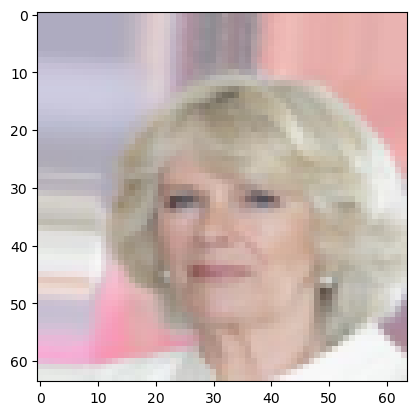

In [11]:
plt.imshow(all_source_images[0].cpu().detach().permute(1, 2, 0).cpu().numpy())

In [12]:
parent_addresses = [all_men_parent, all_women_parent, all_young_parent, all_old_parent, young_men_parent, old_men_parent, young_women_parent, old_women_parent]
considered_lists = [all_men_list, all_women_list, all_young_list, all_old_list, young_men_list, old_men_list, young_women_list, old_women_list]

In [13]:
all_latent_groups_merged = torch.tensor([]).to(device)

to_train_tsne = torch.tensor([]).to(device)

for ind in range(4, 8):
    print("ind: ", ind)
    transform = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.ToTensor()
            ])

    batch_size = 100000

    print("parent_addresses[ind]: ", parent_addresses[ind])

    celeba_data = datasets.ImageFolder(parent_addresses[ind], transform=transform)
    print("celeba_data: ", len(celeba_data))
    considered_list = considered_lists[ind]

    print("considered_list: ", len(considered_list))

    train_set, test_set = torch.utils.data.random_split(celeba_data, [int(len(considered_list) * 1.0), len(considered_list) - int(len(considered_list) * 1.0)])
    train_data_size = len(train_set)
    test_data_size = len(test_set)

    trainLoader = torch.utils.data.DataLoader(train_set,batch_size=batch_size, shuffle=True)


    for idx, (image, label) in enumerate(trainLoader):
        images, label = image.to(device), label.to(device)
        break


    model.eval()
    with torch.no_grad():
        ae_perturbed_embeds = model.encoder(images) # some confusion here. Why are you doin whatever you doing . Should not the input be  data + noise_outputs ?
        mu1, logvar1 = model.fc1(ae_perturbed_embeds), model.fc2(ae_perturbed_embeds)
        std1 = logvar1.mul(0.5).exp_()
        esp1 = torch.randn(*mu1.size()).to(device)
        z1 = mu1 + std1 * esp1
    print("z1.shape", z1.shape)

    #to_train_tsne = torch.cat((to_train_tsne, z1[:4000]), 0)

    #Find 10 nearest neighbours of mean_attackeded_z1 in z1
    from sklearn.neighbors import NearestNeighbors
    import numpy as np
    from sklearn.preprocessing import normalize

    z1 = z1.cpu().detach().numpy()
    z1 = normalize(z1)
    mean_attackeded_z1_cpu = mean_attackeded_z1.cpu().detach().numpy()
    mean_attackeded_z1_cpu = normalize(mean_attackeded_z1_cpu)

    nbrs = NearestNeighbors(n_neighbors=1000, algorithm='ball_tree').fit(z1)
    distances, indices = nbrs.kneighbors(mean_attackeded_z1_cpu)
    #print("distances: ", distances)
    #print("indices: ", indices)
    
    chosen_z1 = z1[indices[0]]

    #print("chosen_z1.shape", chosen_z1.shape)

    chosen_z1 = torch.tensor(chosen_z1).to(device)    

    all_latent_groups_merged = torch.cat((all_latent_groups_merged, chosen_z1), 0)
    print("all_latent_groups_merged.shape", all_latent_groups_merged.shape)

    '''plt.imshow(images[indices[0][0]].cpu().detach().permute(1, 2, 0).cpu().numpy())
    plt.show()
    plt.close()'''
    
#points_to_tsne = torch.cat((to_train_tsne, all_latent_groups_merged), 0)    


ind:  4
parent_addresses[ind]:  /home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngMen_d


celeba_data:  53447
considered_list:  53447
z1.shape torch.Size([53447, 256])
all_latent_groups_merged.shape torch.Size([1000, 256])
ind:  5
parent_addresses[ind]:  /home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldMen_d
celeba_data:  7003
considered_list:  7003
z1.shape torch.Size([7003, 256])
all_latent_groups_merged.shape torch.Size([2000, 256])
ind:  6
parent_addresses[ind]:  /home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_youngWomen_d
celeba_data:  103287
considered_list:  103287
z1.shape torch.Size([100000, 256])
all_latent_groups_merged.shape torch.Size([3000, 256])
ind:  7
parent_addresses[ind]:  /home/luser/autoencoder_attacks/train_aautoencoders/celebA_categorized/celebA_oldWomen_d
celeba_data:  1116
considered_list:  1116
z1.shape torch.Size([1116, 256])
all_latent_groups_merged.shape torch.Size([4000, 256])


In [14]:
all_latent_groups_merged = torch.cat((all_latent_groups_merged, attackeded_z1), 0)


In [15]:
all_latent_groups_merged.shape

torch.Size([4002, 256])

In [16]:
import torch
import numpy as np
from openTSNE import TSNE
from openTSNE.affinity import PerplexityBasedNN

# Check if a GPU is available
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

# Assuming your data is a torch tensor of size [63325, 256]
#data = torch.randn(63325, 256)  # Example tensor
data = all_latent_groups_merged.to(device)

# Convert the tensor to a NumPy array
data_np = data.cpu().numpy()

# Perform t-SNE
tsne = TSNE(
    n_components=2,
    perplexity=30,
    metric="cosine",
    n_jobs=-1,
    random_state=42,
    negative_gradient_method="fft"  # Use FFT-based gradient calculation for speed
)

# Fit and transform the data
embedding = tsne.fit(data_np)

# Convert the result back to a torch tensor
data_tsne_tensor = torch.tensor(embedding, device=device)

# Check the size of the reduced tensor
print(data_tsne_tensor.shape)  # Should print torch.Size([63325, 2])


torch.Size([4002, 2])


# Find nearest neighbours after doing TSNE

In [56]:
attacked_2d_embed = data_tsne_tensor[-1].unsqueeze(0)
before_attack_2d_embed = data_tsne_tensor[-2].unsqueeze(0)

young_men_2d = data_tsne_tensor[0:1000]
old_men_2d = data_tsne_tensor[1000:2000]
young_women_2d = data_tsne_tensor[2000:3000]
old_women_2d = data_tsne_tensor[3000:4000]

before_attack_2d_embed.shape, attacked_2d_embed.shape, young_men_2d.shape, old_men_2d.shape, young_women_2d.shape, old_women_2d.shape

(torch.Size([1, 2]),
 torch.Size([1, 2]),
 torch.Size([1000, 2]),
 torch.Size([1000, 2]),
 torch.Size([1000, 2]),
 torch.Size([1000, 2]))

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

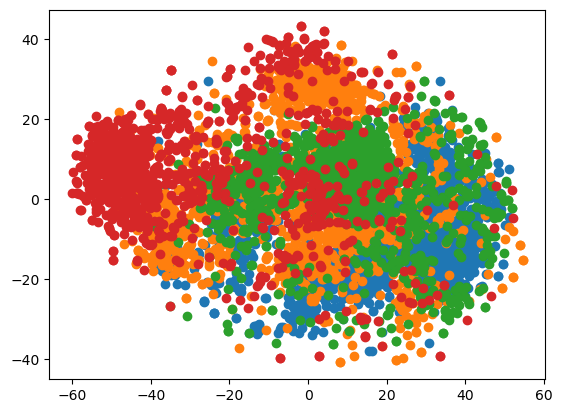

In [60]:

plt.scatter(young_men_2d[:, 0].cpu().detach().numpy(), young_men_2d[:, 1].cpu().detach().numpy())
plt.scatter(old_men_2d[:, 0].cpu().detach().numpy(), old_men_2d[:, 1].cpu().detach().numpy())
plt.scatter(young_women_2d[:, 0].cpu().detach().numpy(), young_women_2d[:, 1].cpu().detach().numpy())
#plt.scatter(old_women_2d[:, 0].cpu().detach().numpy(), old_women_2d[:, 1].cpu().detach().numpy())
plt.scatter(old_women_2d[:, 0].cpu().detach().numpy(), old_women_2d[:, 1].cpu().detach().numpy())
plt.scatter(before_attack_2d_embed[:, 0], before_attack_2d_embed[:, 1], marker='s',  s=400)
plt.scatter(attacked_2d_embed[:, 0], attacked_2d_embed[:, 1], marker='*',  s=400)

In [61]:
def get_nearestNeighbours(population, around_me):

    z1 = population.cpu().detach().numpy()
    #z1 = normalize(z1)
    mean_attackeded_z1_cpu = around_me.cpu().detach().numpy()
    #mean_attackeded_z1_cpu = normalize(mean_attackeded_z1_cpu)

    nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(z1)
    distances, indices = nbrs.kneighbors(mean_attackeded_z1_cpu)
    #print("distances: ", distances)
    #print("indices: ", indices)

    chosen_z1 = z1[indices[0]]

    #print("chosen_z1.shape", chosen_z1.shape)

    chosen_z1 = torch.tensor(chosen_z1).to(device)    
    return chosen_z1

In [62]:
young_men_2d_chosen = get_nearestNeighbours(young_men_2d, attacked_2d_embed)
old_men_2d_chosen = get_nearestNeighbours(old_men_2d, attacked_2d_embed)
young_women_2d_chosen = get_nearestNeighbours(young_women_2d, attacked_2d_embed)
old_women_2d_chosen = get_nearestNeighbours(old_women_2d, attacked_2d_embed)


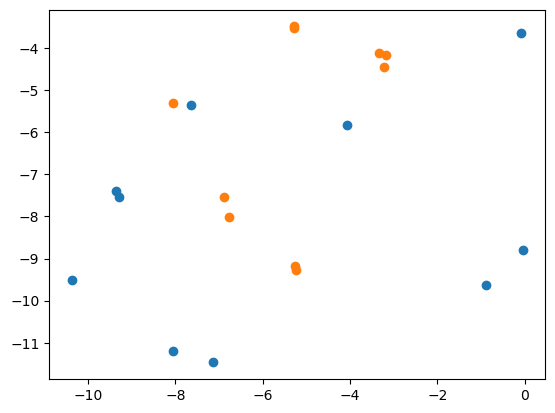

In [63]:
'''plt.scatter(old_men_2d[:, 0].cpu().detach().numpy(), old_men_2d[:, 1].cpu().detach().numpy())
plt.scatter(young_women_2d[:, 0].cpu().detach().numpy(), young_women_2d[:, 1].cpu().detach().numpy())
plt.scatter(old_women_2d[:, 0].cpu().detach().numpy(), old_women_2d[:, 1].cpu().detach().numpy())'''
plt.scatter(young_men_2d_chosen[:, 0].cpu().detach().numpy(), young_men_2d_chosen[:, 1].cpu().detach().numpy())
plt.scatter(old_men_2d_chosen[:, 0].cpu().detach().numpy(), old_men_2d_chosen[:, 1].cpu().detach().numpy())

#plt.scatter(before_attack_2d_embed[:, 0].cpu().detach().numpy(), before_attack_2d_embed[:, 1].cpu().detach().numpy(), marker='s',  s=400)
#plt.scatter(attacked_2d_embed[:, 0].cpu().detach().numpy(), attacked_2d_embed[:, 1].cpu().detach().numpy(), marker='*',  s=400)

In [64]:


young_men_2d_chosen = young_men_2d_chosen.cpu().numpy()
old_men_2d_chosen = old_men_2d_chosen.cpu().numpy()
young_women_2d_chosen = young_women_2d_chosen.cpu().numpy()
old_women_2d_chosen = old_women_2d_chosen.cpu().numpy()
before_attack_2d_embed = before_attack_2d_embed.cpu().numpy()
attacked_2d_embed = attacked_2d_embed.cpu().numpy()
#all_losses = all_losses
# Normalize all_losses to the range [0, 1]
#all_losses_normalized = (np.array(all_losses) - np.min(all_losses)) / (np.max(all_losses) - np.min(all_losses))
#all_losses_normalized = all_losses

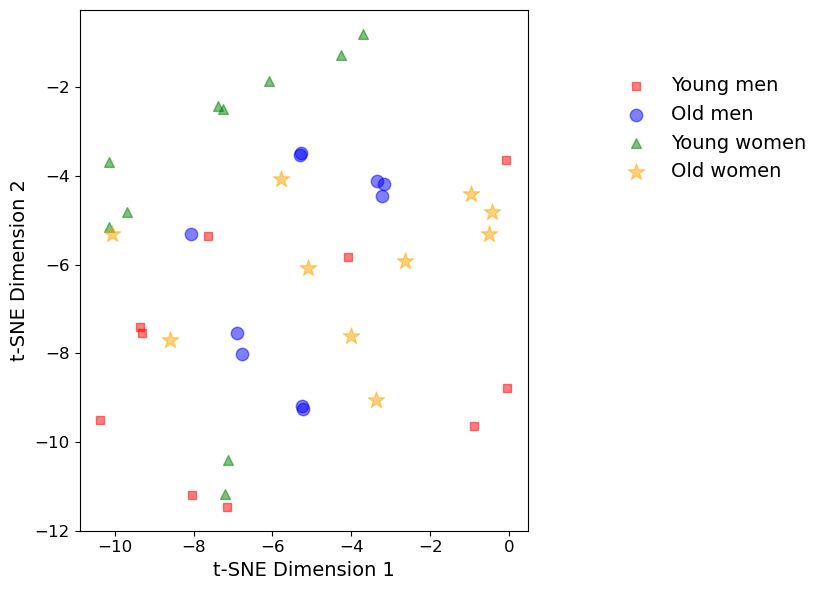

In [65]:
import matplotlib.pyplot as plt

# Assuming you have defined colors and labels for each group
colors = ['red', 'blue', 'green', 'orange']
labels = ['Young men', 'Old men', 'Young women', 'Old women']

fig, ax = plt.subplots(figsize=(10, 6))
# Set the background color of the plot
#fig.patch.set_facecolor('skyblue')
#ax.set_facecolor('skyblue')

batch_size = 10
# Plot each group separately with specified colors and labels
ax.scatter(young_men_2d_chosen[:, 0], young_men_2d_chosen[:, 1], color=colors[0], label=labels[0], alpha=0.5, marker='s',  s=40)
ax.scatter(old_men_2d_chosen[:, 0], old_men_2d_chosen[:, 1], color=colors[1], label=labels[1], alpha=0.5, marker='o',  s=80)
ax.scatter(young_women_2d_chosen[:, 0], young_women_2d_chosen[:, 1], color=colors[2], label=labels[2], alpha=0.5, marker='^',  s=50)
ax.scatter(old_women_2d_chosen[:, 0], old_women_2d_chosen[:, 1], color=colors[3], label=labels[3], alpha=0.5, marker='*',  s=150)

#plt.scatter(data_tsne_tensor[4000:, 0], data_tsne_tensor[4000:, 1], c=all_losses_normalized, cmap='gray_r')
#ax.scatter(before_attack_2d_embed[:, 0], before_attack_2d_embed[:, 1], color='black', marker='*',  s=100)
#ax.scatter(attacked_2d_embed[:, 0], attacked_2d_embed[:, 1], color='gray', marker='*',  s=100)


#cbar = plt.colorbar(scatter)
#cbar.set_label('$\Delta_c$', fontsize=18) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)
#plt.title('t-SNE Scatter Plot Colored by Loss Values')
#plt.show()

# Add legend and place it outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=3., frameon=False, fontsize=14)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()


In [23]:
data_tsne_tensor[4000:].shape

torch.Size([2, 2])

# Pulling tendencies